In [1]:
class Debug:
    def __init__(self, level):
        self.level = level
    def msg(self, level, m):
        if(level <= self.level):
            print(m)
debug = Debug(10).msg

In [2]:
%matplotlib inline
#!/usr/bin/python
#AWS redshift connector:
#setup
from datetime import date, timedelta
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def uniqueSummary(csvname):
    df = pd.read_csv(csvname)
    newdf = pd.DataFrame(columns = df.columns)
    for colName in df.head():
        u = df[colName].unique()
        if len(u) > 100:
            newdf.loc[:, colName] = [len(u), "more than 100"]
        else:
            newdf.loc[:, colName] = [len(u), u]
    newdf = newdf.T
    
    newdf.to_csv("uniqueSummary_" + csvname)
        

In [7]:
## don't run below if you have files in the prefix of uniqueSummary_*
with open("filenames.txt") as f:
    for i in f:
        i = i.strip('\n')
        uniqueSummary(i)
        

/home/r117/miniconda3/envs/snakes/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2825: DtypeWarning: Columns (10,13) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/home/r117/miniconda3/envs/snakes/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2825: DtypeWarning: Columns (3,26) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [4]:
class LOC():
    def __init__(self,lat, long):
        self.lat = lat
        self.long = long

In [45]:
def getNodes(A, B): #(A, B, nodedf) #keep in mind this function assumes lat in negative values
    tempdf = nodedf[(nodedf['Lat'] <= A.lat) & (nodedf['Lat'] >= B.lat) &
                    (nodedf['Long'] <= B.long) & (nodedf['Long'] >= A.long) ]
    return tempdf

## Get the unique probability summary
### age composition, road surface conditions, road atmospheric conditions,

In [8]:
#plot
def plotBarChart(data):
    fig, ax = plt.subplots()

    index = data.index
    bar_width = 0.35

    opacity = 0.4
    error_config = {'ecolor': '0.3'}

    rects1 = plt.bar(index, data.values, bar_width,
                     alpha=opacity,
                     color='b',
                     error_kw=error_config,
                     label='age groups')

    plt.xlabel('Age groups')
    plt.ylabel('Accident counts')
    plt.title('Age vs accidents')
    plt.legend()
    #plt.tight_layout()
    plt.show()


In [31]:
#get road surface condition
def getDetailDF(df1, df2, key, query): #df1 = inrangedf, df2 = which ever data we want to get with the same accident no
    tempdf = df2[df2[key].isin(df1[key])]
    tempdf = tempdf[query].value_counts()
    tempdf2 = tempdf / tempdf.sum()
    return (tempdf, tempdf2)


In [ ]:
#for age: PERSON.csv
#for road surface: ROAD_SURFACE_COND.csv
#for road atmospheric conditions: ATMOSPHERIC_COND.csv
#checking against inrangenodedf
persondf = pd.read_csv("PERSON.csv")
roadSurfacedf = pd.read_csv("ROAD_SURFACE_COND.csv")
roadAtmosphericdf = pd.read_csv("ATMOSPHERIC_COND.csv")
nodedf = pd.read_csv("NODE.csv")
#preferrably load everything at server_start

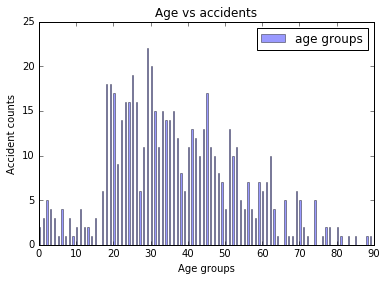

In [46]:
#tie everything together
pointA = LOC(-37.8007939, 144.8803823)
pointB = LOC(-37.8622120,144.8831790)
#===========
inrangedf = getNodes(pointA, pointB) #the function assume the lat is in negative values. 
#injury distribution
injuries1, injuries_pct = getDetailDF(inrangedf, persondf, "ACCIDENT_NO", "INJ_LEVEL")
#age distribution
ages, ages_pct = getDetailDF(inrangedf, persondf, "ACCIDENT_NO", "AGE")
plotBarChart(ages)
#get road surface conditions
roadSurfaces, roadSurfaces_pct = getDetailDF(inrangedf, roadSurfacedf, "ACCIDENT_NO", "Surface Cond Desc")
#get atmospheric conditions
roadAtmospherics, roadAtmospherics_pct = getDetailDF(inrangedf, roadAtmosphericdf, "ACCIDENT_NO", "Atmosph Cond Desc")

In [48]:
#print(type(injuries))
print(injuries)
#print(type(ages))
print(ages)
print(roadSurfaces)
print(roadSurfaces_pct)
print(roadAtmospherics)
print(roadAtmospherics_pct)

{'serious_injury': '12.76%', 'non_injury': '54.02%', 'total_injuries': 635, 'fatality': '0.16%', 'other_injury': '33.07%'}
29.0    22
30.0    20
25.0    19
19.0    18
18.0    18
45.0    17
20.0    17
26.0    16
24.0    16
23.0    16
33.0    15
36.0    15
31.0    15
34.0    14
35.0    14
22.0    14
51.0    13
44.0    13
41.0    13
37.0    12
42.0    12
28.0    11
40.0    11
46.0    11
32.0    11
53.0    11
62.0    10
52.0    10
43.0    10
47.0    10
        ..
63.0     4
55.0     4
57.0     4
8.0      3
15.0     3
4.0      3
1.0      3
58.0     3
10.0     2
12.0     2
13.0     2
0.0      2
77.0     2
71.0     2
80.0     2
78.0     2
7.0      1
85.0     1
83.0     1
81.0     1
5.0      1
88.0     1
64.0     1
9.0      1
76.0     1
72.0     1
68.0     1
14.0     1
67.0     1
89.0     1
Name: AGE, dtype: int64
Dry        195
Wet         35
Unknown     18
Muddy        1
Name: Surface Cond Desc, dtype: int64
Dry        0.783133
Wet        0.140562
Unknown    0.072289
Muddy      0.004016
Name